**Name: Khandoker Akhinur Ibne Jaman**
# Project Title: Handwritten Digit Recognition using Gaussian Naive Bayes, Support Vector Machine and Random Forest Classifier and compare the performance of these 3 models

In this project, Firstly I imported the common libraries and then from the scikit learn dataset I imported the common **mnist dataset** and define data and target value as X and y simultaneously. Also I print the X and y shape to check the shape whether it is correct or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(int)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Now, I split X and y as Xtrain, Xtest, ytrain and ytest using the common scikit learn model train_test_split italicized text

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(52500, 784)
(17500, 784)
(52500,)
(17500,)


Now I will normalize pixel values by dividing by 255 as pixel intensities range from 0 to 255. This normalization technique rescales the values to be between 0 and 1

In [ ]:
Xtrain = Xtrain / 255
Xtest = Xtest / 255

For dimensionality reduction I incorporate PCA (Principal Component Analysis). As PCA helps reduce computational complexity while retaining the most important information in the data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=42)
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

Now I train a Gaussian Naive Bayes (GNB) model on the PCA-transformed data (X_train_pca, y_train) and evaluate its performance on the test set. It calculates the accuracy of the model using accuracy_score, prints a classification report, and visualizes the confusion matrix using a heatmap to show the prediction results of the Naive Bayes model.

Naive Bayes Accuracy: 85.43%
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1714
           1       0.98      0.94      0.96      1977
           2       0.68      0.86      0.76      1761
           3       0.83      0.83      0.83      1806
           4       0.88      0.81      0.84      1587
           5       0.79      0.82      0.80      1607
           6       0.94      0.88      0.91      1761
           7       0.91      0.84      0.87      1878
           8       0.85      0.84      0.84      1657
           9       0.80      0.81      0.81      1752

    accuracy                           0.85     17500
   macro avg       0.86      0.85      0.85     17500
weighted avg       0.86      0.85      0.86     17500



Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

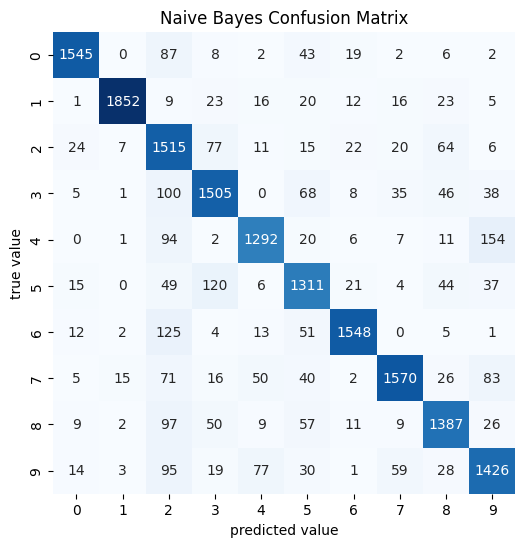

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(Xtrain_pca, ytrain)
yfit1 = model1.predict(Xtest_pca)

accuracy_nb = accuracy_score(ytest, yfit1)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

print(classification_report(ytest, yfit1))

mat = confusion_matrix(ytest, yfit1)
plt.figure(figsize=(6, 6))
sns.heatmap(mat, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Naive Bayes Confusion Matrix')

Now I will randomly select 36 images from the test set, plot them in a 6x6 grid, and display both the true and predicted labels for each image. I will highlight correct predictions in green and incorrect predictions in red.

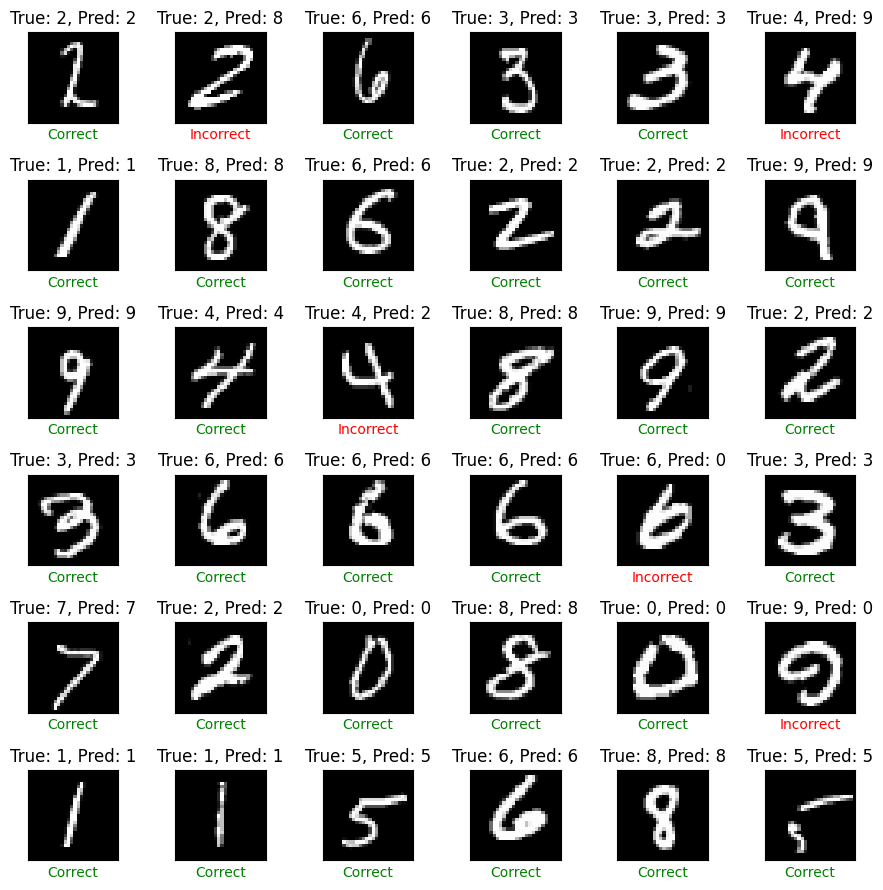

In [ ]:
num_images_to_plot = 36  # Adjust this value as needed
random_indices = np.random.choice(len(Xtest_pca), size=num_images_to_plot, replace=False)

rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(9, 9))

for i, idx in enumerate(random_indices):
  image = Xtest.iloc[idx].values.reshape(28, 28)
  true_label = ytest.iloc[idx]
  predicted_label = yfit1[idx]

  row = math.floor(i / cols)
  col = i % cols

  axes[row, col].imshow(image, cmap='gray')
  axes[row, col].set_title(f"True: {true_label}, Pred: {predicted_label}")

  if true_label == predicted_label:
    axes[row, col].set_xlabel("Correct", color="green")
  else:
    axes[row, col].set_xlabel("Incorrect", color="red")

  axes[row, col].set_xticks([])
  axes[row, col].set_yticks([])

plt.tight_layout()
plt.show()


Now I will define and train an SVM model with an RBF kernel on the PCA-transformed training data. The model is configured with default hyperparameters (C=1.0 and gamma='scale'). After training, it makes predictions on the PCA-transformed test data and stores the results in yfit2.

In [ ]:
from sklearn.svm import SVC

model2 = SVC(kernel='rbf', C=1.0, gamma='scale')
model2.fit(Xtrain_pca, ytrain)
yfit2 = model2.predict(Xtest_pca)

Now I will calculate the accuracy of the SVM model on the test set and prints a detailed classification report showing precision, recall, and F1-score. I also generate a confusion matrix to visualize the model's prediction performance, plotting it as a heatmap with blue shading to indicate the density of correct and incorrect predictions. The plot is labeled with predicted and true values for clarity.

SVM Accuracy: 97.47%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1714
           1       0.99      0.99      0.99      1977
           2       0.96      0.97      0.97      1761
           3       0.97      0.96      0.97      1806
           4       0.97      0.98      0.97      1587
           5       0.98      0.97      0.97      1607
           6       0.98      0.98      0.98      1761
           7       0.97      0.97      0.97      1878
           8       0.97      0.97      0.97      1657
           9       0.97      0.96      0.96      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



Text(0.5, 1.0, 'SVM Confusion Matrix')

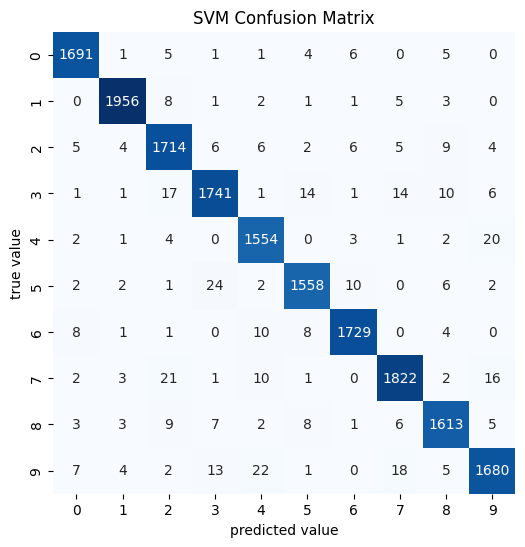

In [ ]:
accuracy_svm = accuracy_score(ytest, yfit2)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(ytest, yfit2))

mat = confusion_matrix(ytest, yfit2)
plt.figure(figsize=(6, 6))
sns.heatmap(mat, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('SVM Confusion Matrix')

Now I will randomly select 36 images from the test set, plot them in a 6x6 grid, and display both the true and predicted labels for each image. I will highlight correct predictions in green and incorrect predictions in red.

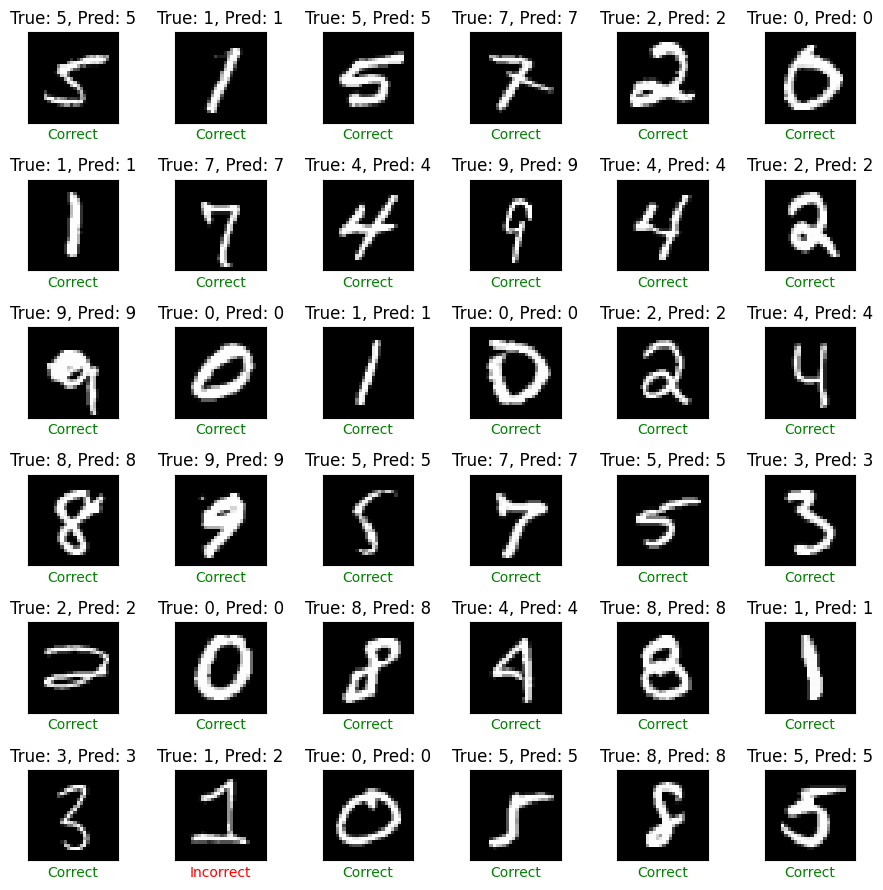

In [ ]:
num_images_to_plot = 36  # Adjust this value as needed
random_indices = np.random.choice(len(Xtest_pca), size=num_images_to_plot, replace=False)

rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(9, 9))

for i, idx in enumerate(random_indices):
  image = Xtest.iloc[idx].values.reshape(28, 28)
  true_label = ytest.iloc[idx]
  predicted_label = yfit2[idx]

  row = math.floor(i / cols)
  col = i % cols

  axes[row, col].imshow(image, cmap='gray')
  axes[row, col].set_title(f"True: {true_label}, Pred: {predicted_label}")

  if true_label == predicted_label:
    axes[row, col].set_xlabel("Correct", color="green")
  else:
    axes[row, col].set_xlabel("Incorrect", color="red")

  axes[row, col].set_xticks([])
  axes[row, col].set_yticks([])

plt.tight_layout()
plt.show()

Now I wil initialize and train a Random Forest Classifier with 100 trees on the original training data. After fitting the model, it will make predictions on the test set and stores the results in yfit3.

In [ ]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(Xtrain, ytrain)
yfit3 = model3.predict(Xtest)

I will calculate and print the accuracy of the Random Forest model on the test set, along with a detailed classification report that includes precision, recall, and F1-score. I also generate a confusion matrix.

Random Forest Accuracy: 96.52%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1714
           1       0.98      0.99      0.99      1977
           2       0.95      0.97      0.96      1761
           3       0.96      0.94      0.95      1806
           4       0.96      0.97      0.97      1587
           5       0.96      0.96      0.96      1607
           6       0.98      0.98      0.98      1761
           7       0.97      0.97      0.97      1878
           8       0.96      0.95      0.95      1657
           9       0.95      0.95      0.95      1752

    accuracy                           0.97     17500
   macro avg       0.96      0.96      0.96     17500
weighted avg       0.97      0.97      0.97     17500



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

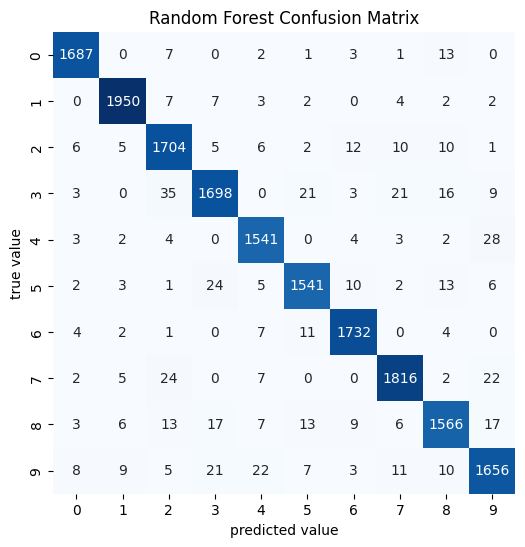

In [ ]:
accuracy_rf = accuracy_score(ytest, yfit3)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print(classification_report(ytest, yfit3))

mat = confusion_matrix(ytest, yfit3)
plt.figure(figsize=(6, 6))
sns.heatmap(mat, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Random Forest Confusion Matrix')

Now I will randomly select 36 images from the test set, plot them in a 6x6 grid, and display both the true and predicted labels for each image. I will highlight correct predictions in green and incorrect predictions in red.

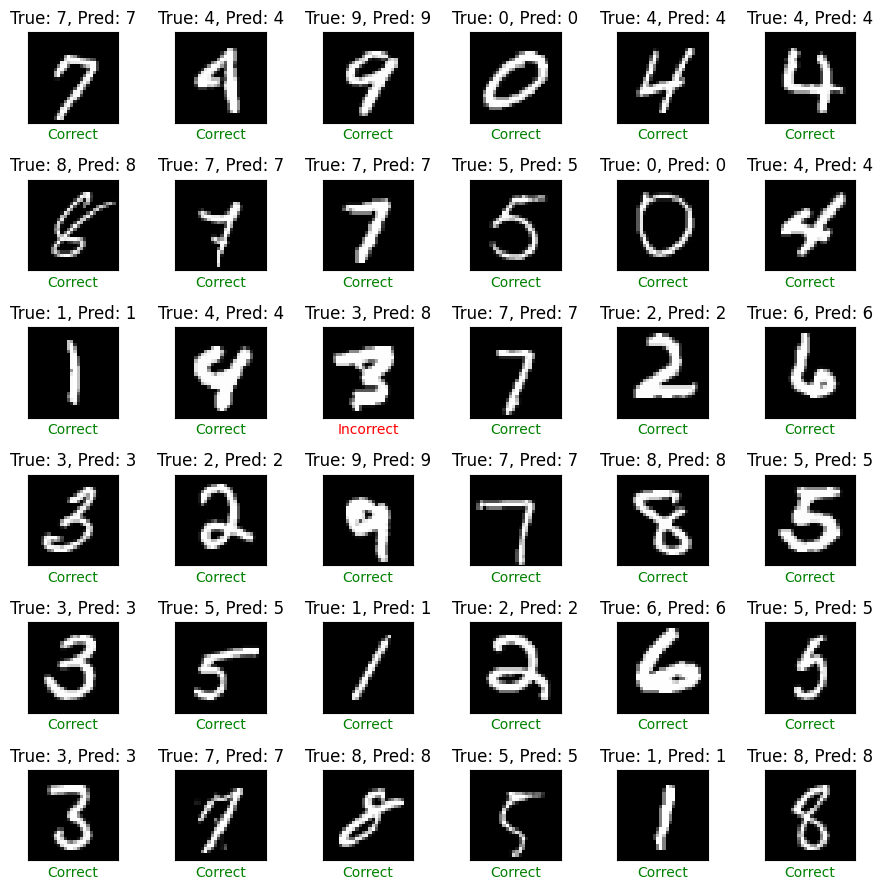

In [ ]:
num_images_to_plot = 36
random_indices = np.random.choice(len(Xtest), size=num_images_to_plot, replace=False)

rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(9, 9))

for i, idx in enumerate(random_indices):
  image = Xtest.iloc[idx].values.reshape(28, 28)
  true_label = ytest.iloc[idx]
  predicted_label = yfit3[idx]

  row = math.floor(i / cols)
  col = i % cols

  axes[row, col].imshow(image, cmap='gray')
  axes[row, col].set_title(f"True: {true_label}, Pred: {predicted_label}")

  if true_label == predicted_label:
    axes[row, col].set_xlabel("Correct", color="green")
  else:
    axes[row, col].set_xlabel("Incorrect", color="red")

  axes[row, col].set_xticks([])
  axes[row, col].set_yticks([])

plt.tight_layout()
plt.show()

Finally I will compare the accuracy of the three models (Naive Bayes, SVM, and Random Forest) by printing their individual accuracy scores as percentages. I will then create a dictionary to store the accuracies of each model, which will be used to generate a bar chart for visual comparison. The chart displays the model names on the x-axis and their respective accuracies on the y-axis, illustrating their performance on the dataset.

Naive Bayes Accuracy: 85.43%
SVM Accuracy: 97.47%
Random Forest Accuracy: 96.52%


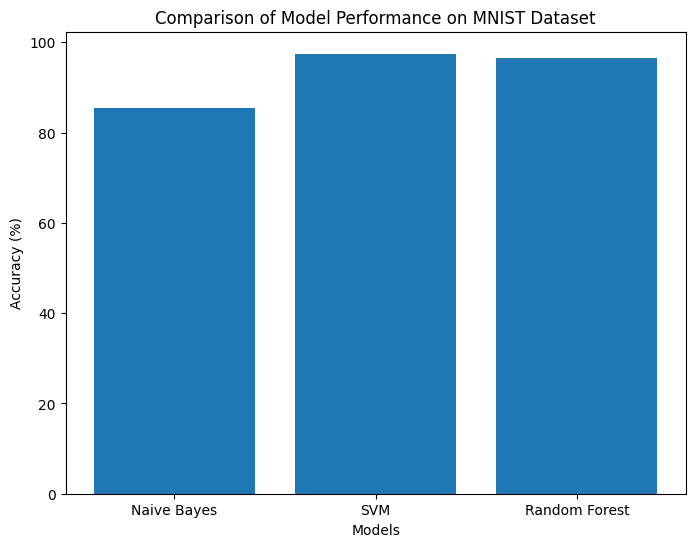

In [ ]:
# Now, I will compare the performance of these 3 models

print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

models_performance = {
    "Naive Bayes": accuracy_nb * 100,
    "SVM": accuracy_svm * 100,
    "Random Forest": accuracy_rf * 100
}

plt.figure(figsize=(8, 6))
plt.bar(models_performance.keys(), models_performance.values())
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Performance on MNIST Dataset")
plt.show()

In my Project, I see that the dataset performs best in the svm model with pca. We got a impressive rersult of 97.47% accuracy when using svm model.random Forest Classifier also performs impressively well with about 96.52% accuracy. But got accuracy of about 85.43% in using Gaussian Naive Bayes which is minimum of this 3 models.


